<a href="https://colab.research.google.com/github/Riya2407/Covid-19-Data-EDA-Report/blob/main/covid19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#install kaggle
!pip install -q kaggle

In [20]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riyag53","key":"3b32c4a807cb42150e1b814fc90e70eb"}'}

In [21]:
#create a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [23]:
! cp kaggle.json ~/.kaggle/

In [25]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [26]:
#To list all dataset in kaggle
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-16 07:08:29           9306  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5688  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2068  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2421  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [27]:
! kaggle datasets download -d sudalairajkumar/covid19-in-india

  0% 0.00/655k [00:00<?, ?B/s]
100% 655k/655k [00:00<00:00, 42.7MB/s]


In [28]:
! unzip covid19-in-india.zip

Archive:  covid19-in-india.zip
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: covid_vaccine_statewise.csv  


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


In [30]:
# state wise covid tests
tests=pd.read_csv("/content/StatewiseTestingDetails.csv")

In [31]:
# Total cases in India
cases=pd.read_csv("/content/covid_19_india.csv")

In [32]:
# total vaccination details
vaccine=pd.read_csv("/content/covid_vaccine_statewise.csv")

Understanding the data

In [33]:
# checking columns names of tests file
tests.head() 

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [35]:
# checking colums names of cases file
cases.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2


In [37]:
# checking columns nanes of vaccine file
vaccine.head(3)

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0


In [38]:
#checking the information of tests file
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15113 entries, 0 to 15112
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15113 non-null  object 
 1   State         15113 non-null  object 
 2   TotalSamples  15113 non-null  float64
 3   Negative      6657 non-null   object 
 4   Positive      5589 non-null   float64
dtypes: float64(2), object(3)
memory usage: 590.5+ KB


In [39]:
#checking description of tests file
tests.describe()

,TotalSamples,Positive
count,1.511300e+04,5.589000e+03
mean,4.675773e+06,5.444224e+04
std,7.606151e+06,1.647919e+05
min,5.800000e+01,0.000000e+00
25%,1.436260e+05,5.210000e+02
50%,7.701740e+05,4.595000e+03
75%,6.414658e+06,3.335200e+04
max,5.933166e+07,1.638961e+06


In [40]:
#cheching null values in cases file
cases.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [41]:
cases= cases.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
cases.head()
# deleting sno , ConfirmedIndianNational,ConfirmedForeignNational

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [42]:
cases['Active'] = cases['Confirmed'] - cases['Cured'] - cases['Deaths']
cases.tail() 
# calculating active cases in our country

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
16845,2021-07-07,8:00 AM,Telangana,613124,3703,628282,11455
16846,2021-07-07,8:00 AM,Tripura,63964,701,68612,3947
16847,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882,1538
16848,2021-07-07,8:00 AM,Uttar Pradesh,1682130,22656,1706818,2032
16849,2021-07-07,8:00 AM,West Bengal,1472132,17834,1507241,17275


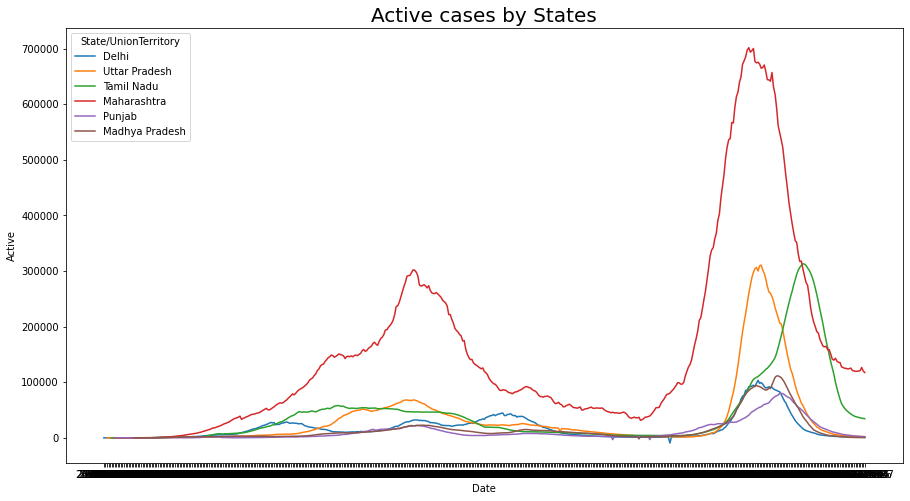

In [46]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=cases[cases['State/UnionTerritory'].isin(['Punjab','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Madhya Pradesh'])],x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()
# Active cases in top 6 states during the period of time

In [48]:
india_cases = cases[cases['Date'] == cases['Date'].max()].copy().fillna(0)
india_cases.index = india_cases["State/UnionTerritory"]
india_cases = india_cases.drop(['State/UnionTerritory','Date'], axis=1)

In [49]:
india_cases.head()

,Time,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,8:00 AM,7343,128,7487,16
Andhra Pradesh,8:00 AM,1861937,12898,1908065,33230
Arunachal Pradesh,8:00 AM,34525,181,37879,3173
Assam,8:00 AM,493306,4717,522267,24244
Bihar,8:00 AM,711913,9612,722746,1221


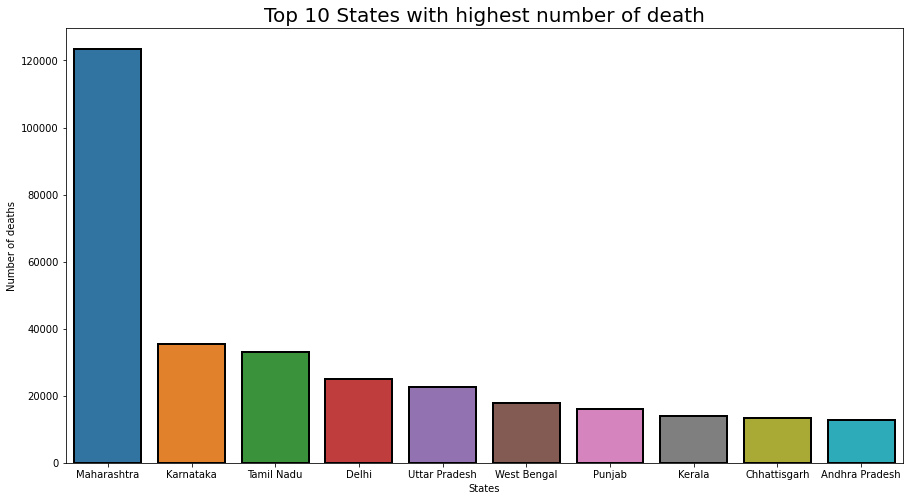

In [50]:
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("states")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.Deaths,x=top_10_death_states.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of deaths')
plt.show()

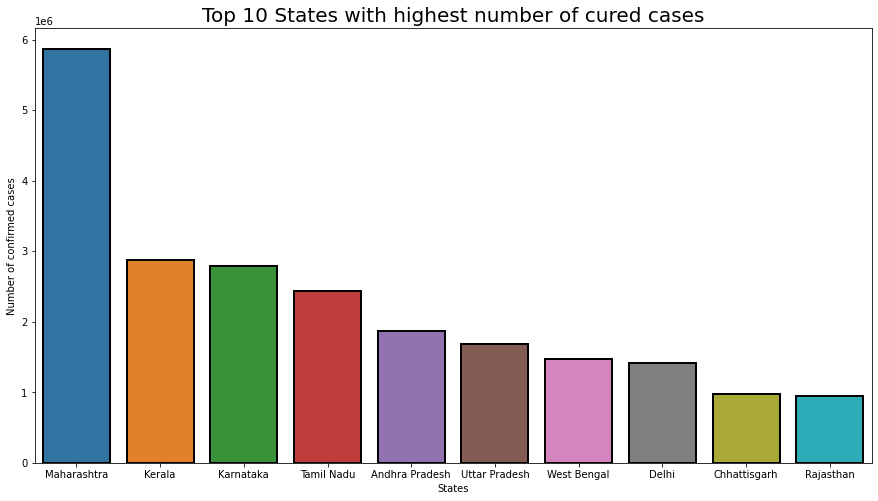

In [51]:
top_10_cured_cases = india_cases.sort_values('Cured',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cured cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of cured cases")
ax=sns.barplot(data=top_10_cured_cases.iloc[:10],y=top_10_cured_cases.Cured,x=top_10_cured_cases.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

In [52]:
vaccine.head(10)

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,132784.0,233143.0,38.0,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,193899.0,355402.0,80.0,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,267856.0,491049.0,103.0,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,296283.0,538647.0,128.0,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,444137.0,832766.0,201.0,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,1277104.0


In [54]:
vaccine.shape

(6699, 18)

In [55]:
vaccine.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                335
Total Sessions Conducted                336
Total Sites                             336
First Dose Administered                 336
Second Dose Administered                336
Male(Individuals Vaccinated)            336
Female(Individuals Vaccinated)          336
Transgender(Individuals Vaccinated)     336
Total Covaxin Administered              336
Total CoviShield Administered           336
Total Sputnik V Administered           4962
AEFI                                   2519
18-45 years (Age)                      2522
45-60 years (Age)                      2521
60+ years (Age)                        2521
Total Individuals Vaccinated            336
dtype: int64

In [57]:
vaccine = vaccine.drop(['Total Sputnik V Administered','AEFI', '18-45 years (Age)','45-60 years (Age)','60+ years (Age)'], axis=1)
# removing columns having most null values

In [58]:
vaccine.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0


In [61]:
male = vaccine["Male(Individuals Vaccinated)"].sum() 
female = vaccine["Female(Individuals Vaccinated)"].sum()  
trans = vaccine["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

In [62]:
Covaxin = vaccine["Total Covaxin Administered"].sum() 
Covishield = vaccine["Total CoviShield Administered"].sum()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [63]:
v=vaccine[vaccine.State!='India']
print(v.index)

Int64Index([ 183,  184,  185,  186,  187,  188,  189,  190,  191,  192,
            ...
            6689, 6690, 6691, 6692, 6693, 6694, 6695, 6696, 6697, 6698],
           dtype='int64', length=6516)


In [65]:
v.head(6)

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated
183,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0
184,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0
185,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,42.0
186,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,89.0
187,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,124.0
188,21/01/2021,Andaman and Nicobar Islands,239.0,22.0,6.0,239.0,0.0,110.0,129.0,0.0,0.0,239.0,239.0


In [67]:
States_grouped=v.groupby('State')['Total'].sum().to_frame('Total')
States_grouped=States_grouped.sort_values('Total',ascending=False).head(5)
States_grouped

,Total
State,
Maharashtra,1.717369e+09
Uttar Pradesh,1.526352e+09
Rajasthan,1.390911e+09
Gujarat,1.320173e+09
West Bengal,1.126840e+09


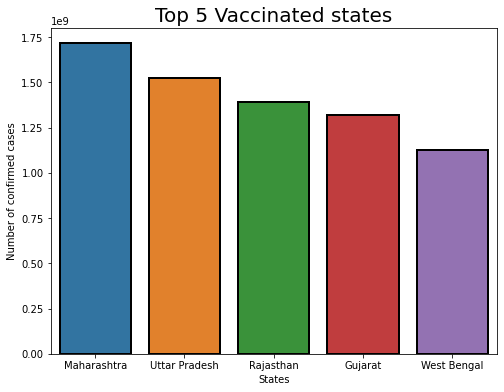

In [68]:
fig=plt.figure(figsize=(8,6))
plt.title("Top 5 Vaccinated states", size=20)
plt.xlabel("states")
plt.ylabel("Vaccination number")
x=sns.barplot(data=States_grouped.iloc[:10],y=States_grouped.Total,x=States_grouped.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

In [69]:
Doses = vaccine["Total Doses Administered"].sum() 
Vaccinated = vaccine["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [70]:
df_Delhi=vaccine[vaccine['State']=='Delhi']

In [71]:
Doses = df_Delhi["Total Doses Administered"].sum() 
Vaccinated = df_Delhi["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

# Thank you